In [1]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Cấu hình
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Import thành công!")

✅ Import thành công!


In [2]:
# Đường dẫn
DATA_RAW = Path('../data/raw')
DATA_PROCESSED = Path('../data/processed')

# Tạo thư mục processed nếu chưa có
DATA_PROCESSED.mkdir(parents=True, exist_ok=True)

# Load dữ liệu
print("📂 Đang load dữ liệu...")

btc_5m = pd.read_csv(DATA_RAW / 'BTCUSDT_5m.csv')
eth_5m = pd.read_csv(DATA_RAW / 'ETHUSDT_5m.csv')
btc_1d = pd.read_csv(DATA_RAW / 'BTCUSDT_1d.csv')
eth_1d = pd.read_csv(DATA_RAW / 'ETHUSDT_1d.csv')

# Chuyển datetime
for df in [btc_5m, eth_5m, btc_1d, eth_1d]:
    df['datetime'] = pd.to_datetime(df['datetime'])

print("✅ Load dữ liệu thành công!\n")
print(f"📊 Số lượng dữ liệu:")
print(f"  • BTC 5m: {len(btc_5m):,} nến")
print(f"  • ETH 5m: {len(eth_5m):,} nến")
print(f"  • BTC 1d: {len(btc_1d):,} nến")
print(f"  • ETH 1d: {len(eth_1d):,} nến")

📂 Đang load dữ liệu...
✅ Load dữ liệu thành công!

📊 Số lượng dữ liệu:
  • BTC 5m: 52,416 nến
  • ETH 5m: 52,416 nến
  • BTC 1d: 1,095 nến
  • ETH 1d: 1,095 nến


In [8]:
# Hàm phát hiện outliers (IQR method)
def detect_outliers(df, name, column='close'):
    """
    Phát hiện outliers nhưng KHÔNG xóa
    Crypto có biến động mạnh → outlier là tín hiệu thật
    """
    print(f"\n{'='*60}")
    print(f"📊 PHÁT HIỆN OUTLIERS - {name} ({column})")
    print(f"{'='*60}")
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"  • Q1 (25%): {Q1:,.2f}")
    print(f"  • Q3 (75%): {Q3:,.2f}")
    print(f"  • IQR: {IQR:,.2f}")
    print(f"  • Lower Bound: {lower_bound:,.2f}")
    print(f"  • Upper Bound: {upper_bound:,.2f}")
    print(f"  • Số outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"\n⚠️ LƯU Ý: Crypto có biến động mạnh, KHÔNG xóa outliers!")
    
    return outliers

# Phát hiện outliers (chỉ quan sát)
btc_5m_outliers = detect_outliers(btc_5m, "BTC 5m")
eth_5m_outliers = detect_outliers(eth_5m, "ETH 5m")
btc_1d_outliers = detect_outliers(btc_1d, "BTC 1d")
eth_1d_outliers = detect_outliers(eth_1d, "ETH 1d")


📊 PHÁT HIỆN OUTLIERS - BTC 5m (close)
  • Q1 (25%): 106,160.31
  • Q3 (75%): 115,919.03
  • IQR: 9,758.73
  • Lower Bound: 91,522.21
  • Upper Bound: 130,557.12
  • Số outliers: 0 (0.00%)

⚠️ LƯU Ý: Crypto có biến động mạnh, KHÔNG xóa outliers!

📊 PHÁT HIỆN OUTLIERS - ETH 5m (close)
  • Q1 (25%): 2,534.64
  • Q3 (75%): 4,295.79
  • IQR: 1,761.15
  • Lower Bound: -107.09
  • Upper Bound: 6,937.52
  • Số outliers: 0 (0.00%)

⚠️ LƯU Ý: Crypto có biến động mạnh, KHÔNG xóa outliers!

📊 PHÁT HIỆN OUTLIERS - BTC 1d (close)
  • Q1 (25%): 28,372.25
  • Q3 (75%): 94,214.41
  • IQR: 65,842.15
  • Lower Bound: -70,390.98
  • Upper Bound: 192,977.64
  • Số outliers: 0 (0.00%)

⚠️ LƯU Ý: Crypto có biến động mạnh, KHÔNG xóa outliers!

📊 PHÁT HIỆN OUTLIERS - ETH 1d (close)
  • Q1 (25%): 1,807.60
  • Q3 (75%): 3,243.20
  • IQR: 1,435.60
  • Lower Bound: -345.81
  • Upper Bound: 5,396.61
  • Số outliers: 0 (0.00%)

⚠️ LƯU Ý: Crypto có biến động mạnh, KHÔNG xóa outliers!


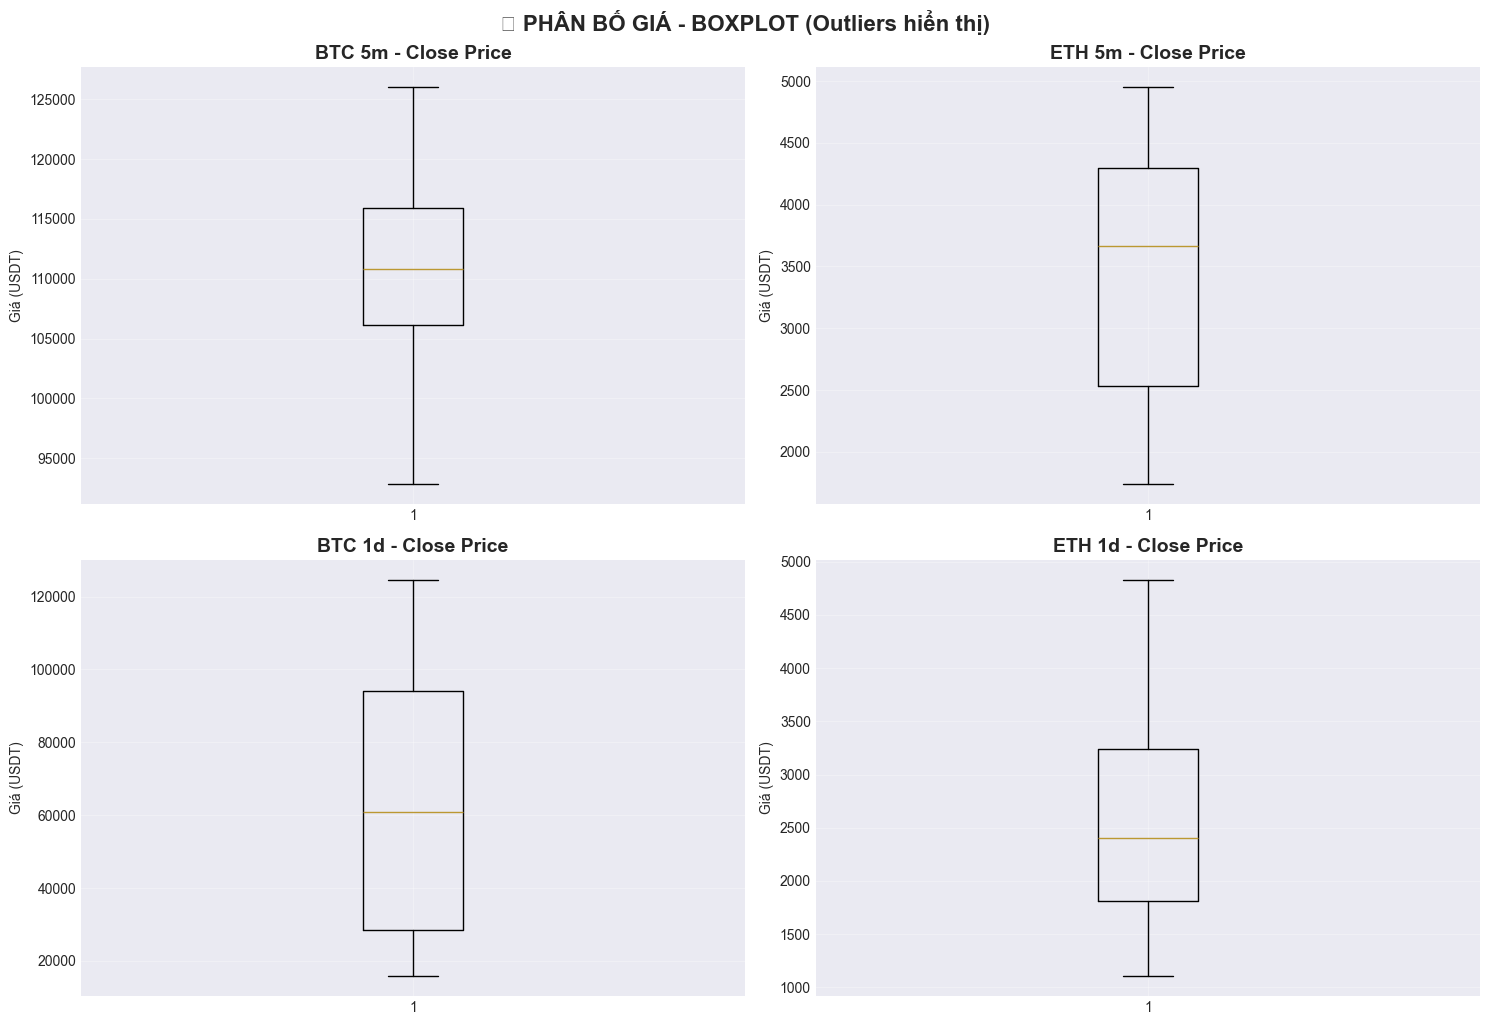

ℹ️ Các điểm nằm ngoài whiskers là outliers
⚠️ Với crypto, đây là biến động thật, KHÔNG xóa!


In [9]:
# Vẽ boxplot để quan sát outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# BTC 5m
axes[0, 0].boxplot(btc_5m['close'])
axes[0, 0].set_title('BTC 5m - Close Price', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Giá (USDT)')
axes[0, 0].grid(True, alpha=0.3)

# ETH 5m
axes[0, 1].boxplot(eth_5m['close'])
axes[0, 1].set_title('ETH 5m - Close Price', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Giá (USDT)')
axes[0, 1].grid(True, alpha=0.3)

# BTC 1d
axes[1, 0].boxplot(btc_1d['close'])
axes[1, 0].set_title('BTC 1d - Close Price', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Giá (USDT)')
axes[1, 0].grid(True, alpha=0.3)

# ETH 1d
axes[1, 1].boxplot(eth_1d['close'])
axes[1, 1].set_title('ETH 1d - Close Price', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Giá (USDT)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('📊 PHÂN BỐ GIÁ - BOXPLOT (Outliers hiển thị)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("ℹ️ Các điểm nằm ngoài whiskers là outliers")
print("⚠️ Với crypto, đây là biến động thật, KHÔNG xóa!")

In [10]:
# Hàm kiểm tra time gaps
def check_time_continuity(df, name, expected_interval):
    """
    Kiểm tra tính liên tục của dữ liệu thời gian
    expected_interval: '5min' hoặc '1D'
    """
    print(f"\n{'='*60}")
    print(f"⏰ KIỂM TRA TÍNH LIÊN TỤC - {name}")
    print(f"{'='*60}")
    
    # Sắp xếp theo thời gian
    df_sorted = df.sort_values('datetime').reset_index(drop=True)
    
    # Tính khoảng cách giữa các timestamp
    df_sorted['time_diff'] = df_sorted['datetime'].diff()
    
    # Tìm gaps (khoảng cách lớn hơn expected)
    if expected_interval == '5min':
        expected_gap = pd.Timedelta(minutes=5)
    elif expected_interval == '1D':
        expected_gap = pd.Timedelta(days=1)
    
    gaps = df_sorted[df_sorted['time_diff'] > expected_gap * 1.5]
    
    print(f"  • Expected interval: {expected_interval}")
    print(f"  • Số gaps phát hiện: {len(gaps)}")
    
    if len(gaps) > 0:
        print(f"\n⚠️ Phát hiện {len(gaps)} gaps:")
        print(gaps[['datetime', 'time_diff']].head(10))
    else:
        print("✅ Dữ liệu liên tục, không có gaps!")
    
    return gaps

# Kiểm tra từng dataset
btc_5m_gaps = check_time_continuity(btc_5m, "BTC 5m", '5min')
eth_5m_gaps = check_time_continuity(eth_5m, "ETH 5m", '5min')
btc_1d_gaps = check_time_continuity(btc_1d, "BTC 1d", '1D')
eth_1d_gaps = check_time_continuity(eth_1d, "ETH 1d", '1D')


⏰ KIỂM TRA TÍNH LIÊN TỤC - BTC 5m
  • Expected interval: 5min
  • Số gaps phát hiện: 0
✅ Dữ liệu liên tục, không có gaps!

⏰ KIỂM TRA TÍNH LIÊN TỤC - ETH 5m
  • Expected interval: 5min
  • Số gaps phát hiện: 0
✅ Dữ liệu liên tục, không có gaps!

⏰ KIỂM TRA TÍNH LIÊN TỤC - BTC 1d
  • Expected interval: 1D
  • Số gaps phát hiện: 0
✅ Dữ liệu liên tục, không có gaps!

⏰ KIỂM TRA TÍNH LIÊN TỤC - ETH 1d
  • Expected interval: 1D
  • Số gaps phát hiện: 0
✅ Dữ liệu liên tục, không có gaps!


In [11]:
# Hàm chuẩn hóa định dạng
def standardize_format(df, name):
    """
    Chuẩn hóa định dạng cuối cùng:
    - Sắp xếp theo thời gian
    - Reset index
    - Đảm bảo columns đúng thứ tự
    - Đảm bảo kiểu dữ liệu đúng
    """
    print(f"\n{'='*60}")
    print(f"✨ CHUẨN HÓA ĐỊNH DẠNG - {name}")
    print(f"{'='*60}")
    
    df_final = df.copy()
    
    # Sắp xếp theo thời gian
    df_final = df_final.sort_values('datetime').reset_index(drop=True)
    
    # Chọn và sắp xếp columns
    columns_order = ['datetime', 'open', 'high', 'low', 'close', 'volume']
    df_final = df_final[columns_order]
    
    # Đảm bảo kiểu dữ liệu
    df_final['datetime'] = pd.to_datetime(df_final['datetime'])
    for col in ['open', 'high', 'low', 'close', 'volume']:
        df_final[col] = pd.to_numeric(df_final[col], errors='coerce')
    
    print(f"✅ Chuẩn hóa thành công!")
    print(f"  • Số dòng: {len(df_final):,}")
    print(f"  • Columns: {list(df_final.columns)}")
    print(f"  • Từ: {df_final['datetime'].min()}")
    print(f"  • Đến: {df_final['datetime'].max()}")
    
    return df_final

# Chuẩn hóa từng dataset
btc_5m_final = standardize_format(btc_5m, "BTC 5m")
eth_5m_final = standardize_format(eth_5m, "ETH 5m")
btc_1d_final = standardize_format(btc_1d, "BTC 1d")
eth_1d_final = standardize_format(eth_1d, "ETH 1d")


✨ CHUẨN HÓA ĐỊNH DẠNG - BTC 5m
✅ Chuẩn hóa thành công!
  • Số dòng: 52,416
  • Columns: ['datetime', 'open', 'high', 'low', 'close', 'volume']
  • Từ: 2025-04-27 08:30:00
  • Đến: 2025-10-26 08:25:00

✨ CHUẨN HÓA ĐỊNH DẠNG - ETH 5m
✅ Chuẩn hóa thành công!
  • Số dòng: 52,416
  • Columns: ['datetime', 'open', 'high', 'low', 'close', 'volume']
  • Từ: 2025-04-27 08:30:00
  • Đến: 2025-10-26 08:25:00

✨ CHUẨN HÓA ĐỊNH DẠNG - BTC 1d
✅ Chuẩn hóa thành công!
  • Số dòng: 1,095
  • Columns: ['datetime', 'open', 'high', 'low', 'close', 'volume']
  • Từ: 2022-10-28 07:00:00
  • Đến: 2025-10-26 07:00:00

✨ CHUẨN HÓA ĐỊNH DẠNG - ETH 1d
✅ Chuẩn hóa thành công!
  • Số dòng: 1,095
  • Columns: ['datetime', 'open', 'high', 'low', 'close', 'volume']
  • Từ: 2022-10-28 07:00:00
  • Đến: 2025-10-26 07:00:00


In [12]:
# Lưu dữ liệu clean
print("\n" + "="*60)
print("💾 LƯU DỮ LIỆU ĐÃ LÀM SẠCH")
print("="*60)

# Lưu từng file
datasets = {
    'BTCUSDT_5m_clean.csv': btc_5m_final,
    'ETHUSDT_5m_clean.csv': eth_5m_final,
    'BTCUSDT_1d_clean.csv': btc_1d_final,
    'ETHUSDT_1d_clean.csv': eth_1d_final
}

for filename, df in datasets.items():
    filepath = DATA_PROCESSED / filename
    df.to_csv(filepath, index=False)
    print(f"✅ Đã lưu: {filepath}")
    print(f"   → {len(df):,} dòng")

print("\n✅ Hoàn thành! Dữ liệu đã làm sạch lưu tại: data/processed/")


💾 LƯU DỮ LIỆU ĐÃ LÀM SẠCH
✅ Đã lưu: ../data/processed/BTCUSDT_5m_clean.csv
   → 52,416 dòng
✅ Đã lưu: ../data/processed/ETHUSDT_5m_clean.csv
   → 52,416 dòng
✅ Đã lưu: ../data/processed/BTCUSDT_1d_clean.csv
   → 1,095 dòng
✅ Đã lưu: ../data/processed/ETHUSDT_1d_clean.csv
   → 1,095 dòng

✅ Hoàn thành! Dữ liệu đã làm sạch lưu tại: data/processed/
